In [3]:
import pandas as pd
import matplotlib.pyplot as plt


/var/folders/gv/8y8kgtw10_37gt24l8br4nvc0000gn/T/ipykernel_74726/4043472463.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  douglas_data_new['year'] = pd.to_numeric(douglas_data_new['year'])
/var/folders/gv/8y8kgtw10_37gt24l8br4nvc0000gn/T/ipykernel_74726/4043472463.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  douglas_data_new['births'] = pd.to_numeric(douglas_data_new['births'])


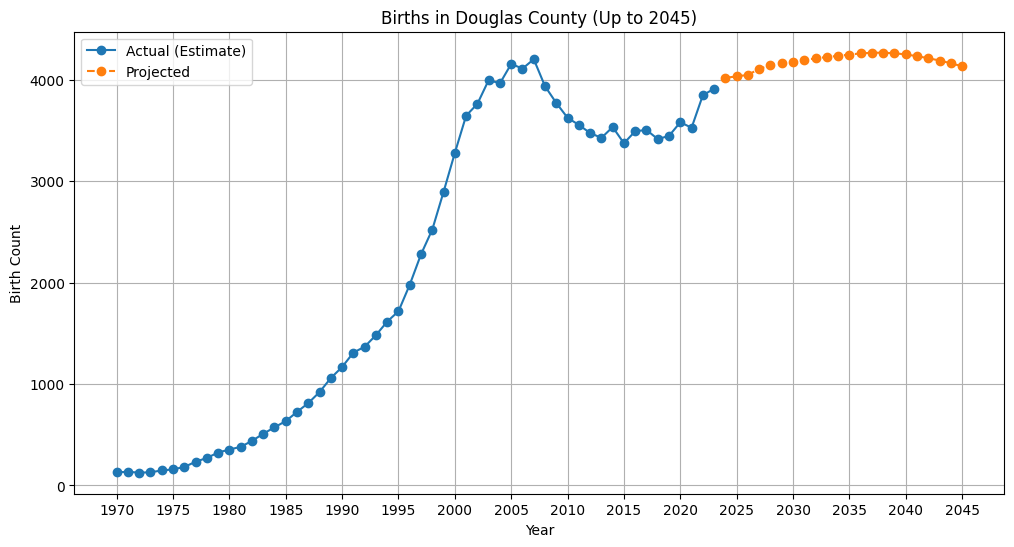

In [18]:
# Load the new CSV file
new_file_path = 'components-change-county.csv'
df = pd.read_csv(new_file_path)

# Filter data for Douglas County (FIPS code: 35)
douglas_data_new = df[df['countyfips'] == 35]

# Convert year and births to numeric
douglas_data_new['year'] = pd.to_numeric(douglas_data_new['year'])
douglas_data_new['births'] = pd.to_numeric(douglas_data_new['births'])

# Filter data up to 2045
douglas_data_new = douglas_data_new[douglas_data_new['year'] <= 2045]

# Separate actual estimates and projections
actual_data_new = douglas_data_new[douglas_data_new['datatype'] == 'Estimate']
projected_data_new = douglas_data_new[douglas_data_new['datatype'] == 'Projection']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(actual_data_new['year'], actual_data_new['births'], marker='o', label='Actual (Estimate)')
plt.plot(projected_data_new['year'], projected_data_new['births'], marker='o', label='Projected', linestyle='--')

# Customize the plot
plt.title('Births in Douglas County (Up to 2045)')
plt.xlabel('Year')
plt.ylabel('Birth Count')
plt.xticks(range(min(douglas_data_new['year']), 2046, 5))
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


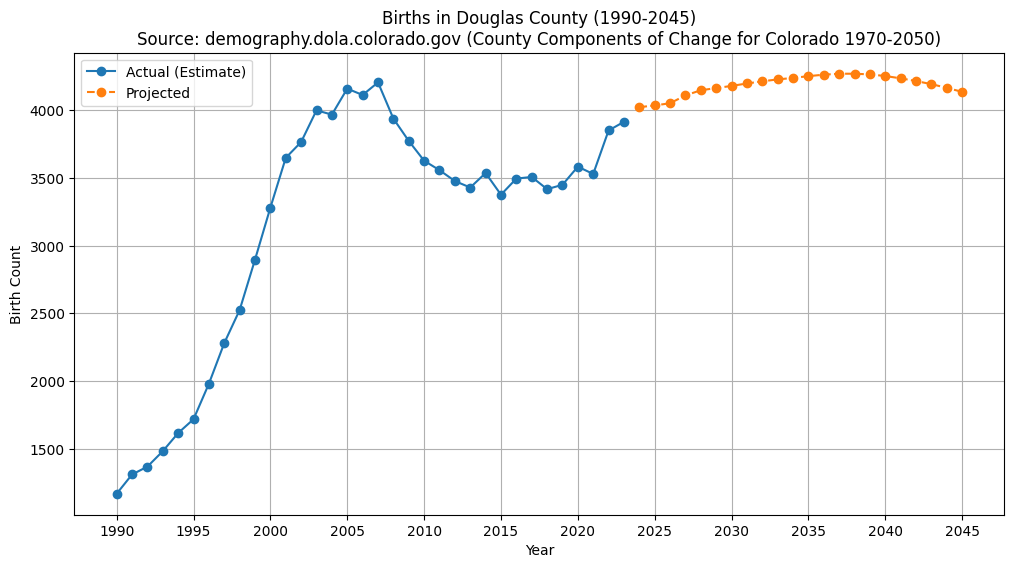

In [15]:
# Filter data from 1990 onwards
douglas_data_1990 = douglas_data_new[douglas_data_new['year'] >= 1990]

# Separate actual estimates and projections for post-1990 data
actual_data_1990 = douglas_data_1990[douglas_data_1990['datatype'] == 'Estimate']
projected_data_1990 = douglas_data_1990[douglas_data_1990['datatype'] == 'Projection']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(actual_data_1990['year'], actual_data_1990['births'], marker='o', label='Actual (Estimate)')
plt.plot(projected_data_1990['year'], projected_data_1990['births'], marker='o', label='Projected', linestyle='--')

# Customize the plot
plt.title('Births in Douglas County (1990-2045)\nSource: demography.dola.colorado.gov (County Components of Change for Colorado 1970-2050)')
plt.xlabel('Year')
plt.ylabel('Birth Count')
plt.xticks(range(1990, 2046, 5))
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [23]:
# Get unique county codes from the CSV file
df = pd.read_csv(new_file_path)
# Get unique pairs of countyfips and countyname
unique_counties = df[['countyfips', 'countyname']].drop_duplicates()
print("County FIPS codes and their corresponding names:")
print(unique_counties.sort_values('countyfips'))

# Create a dictionary mapping county names to FIPS codes
counties_of_interest = ['Arapahoe', 'Elbert', 'El Paso', 'Jefferson', 'Teller', 'Denver', 'Douglas']
fips_lookup = unique_counties[unique_counties['countyname'].isin(counties_of_interest)]
print("\nFIPS codes for counties of interest:")
print(fips_lookup.sort_values('countyname'))



County FIPS codes and their corresponding names:
    countyfips  countyname
0            0    Colorado
1            1       Adams
2            3     Alamosa
3            5    Arapahoe
4            7   Archuleta
..         ...         ...
59         117      Summit
60         119      Teller
61         121  Washington
62         123        Weld
63         125        Yuma

[65 rows x 2 columns]

FIPS codes for counties of interest:
    countyfips countyname
3            5   Arapahoe
16          31     Denver
18          35    Douglas
21          41    El Paso
20          39     Elbert
30          59  Jefferson
60         119     Teller


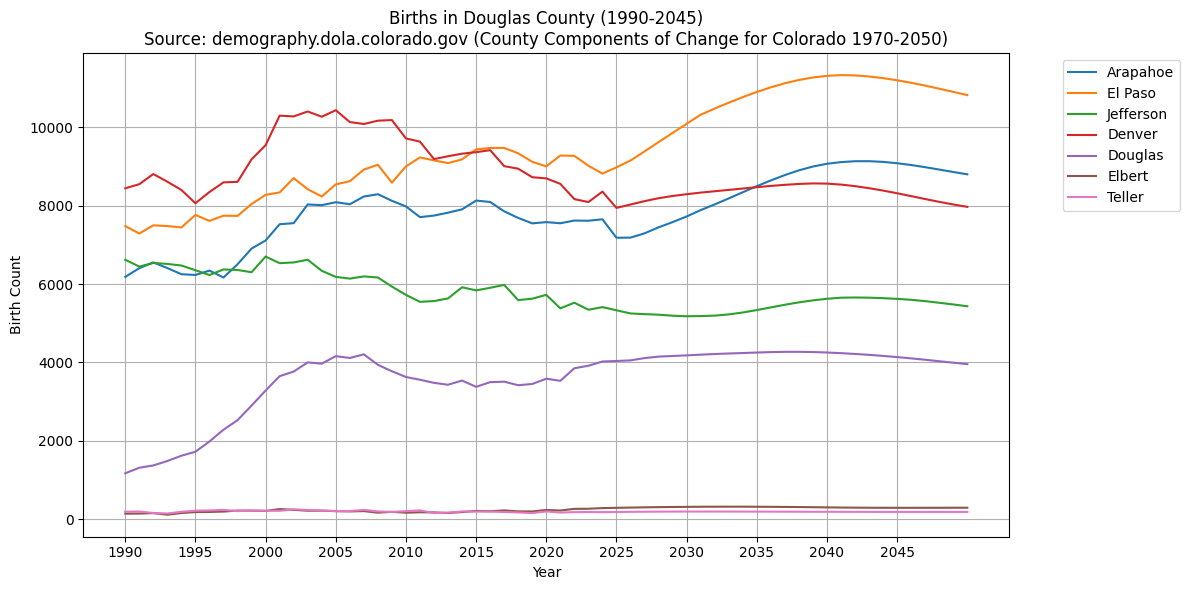

In [40]:
# Get data for specified counties
counties = ['Arapahoe', 'El Paso', 'Jefferson', 'Denver', 'Douglas', 'Elbert', 'Teller']
county_data = {}

df = pd.read_csv(new_file_path)

for county in counties:
    county_data[county] = df[df['countyname'] == county]

plt.figure(figsize=(12, 6))

# Plot data for each county
for county in counties:
    county_df = county_data[county]
    
    # Filter data from 1990 onwards
    county_df_1990 = county_df[county_df['year'] >= 1990]
    
    # Plot data with solid line
    plt.plot(county_df_1990['year'], county_df_1990['births'], label=county)

# Customize the plot
plt.title('Births in Douglas County (1990-2045)\nSource: demography.dola.colorado.gov (County Components of Change for Colorado 1970-2050)')
plt.xlabel('Year')
plt.ylabel('Birth Count')
plt.xticks(range(1990, 2046, 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()


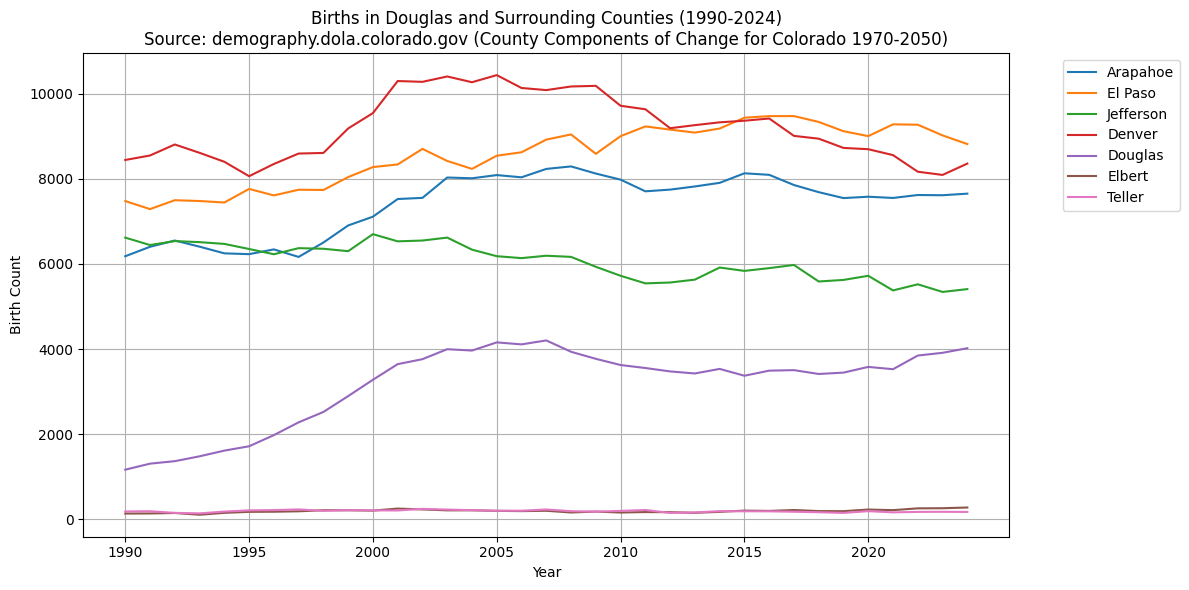

In [42]:
# Get data for specified counties
counties = ['Arapahoe', 'El Paso', 'Jefferson', 'Denver', 'Douglas', 'Elbert', 'Teller']
county_data = {}

df = pd.read_csv(new_file_path)

for county in counties:
    county_data[county] = df[df['countyname'] == county]

plt.figure(figsize=(12, 6))

# Plot data for each county
for county in counties:
    county_df = county_data[county]
    
    # Filter data from 1990 onwards and exclude projections
    county_df_filtered = county_df[(county_df['year'] >= 1990) & (county_df['year'] <= 2024)]
    
    # Plot data with solid line
    plt.plot(county_df_filtered['year'], county_df_filtered['births'], label=county)

# Customize the plot
plt.title('Births in Douglas and Surrounding Counties (1990-2024)\nSource: demography.dola.colorado.gov (County Components of Change for Colorado 1970-2050)')
plt.xlabel('Year')
plt.ylabel('Birth Count')
plt.xticks(range(1990, 2024, 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

/var/folders/gv/8y8kgtw10_37gt24l8br4nvc0000gn/T/ipykernel_74726/216290042.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  douglas_data_1990['births_and_migration'] = douglas_data_1990['births'] + douglas_data_1990['netmig']


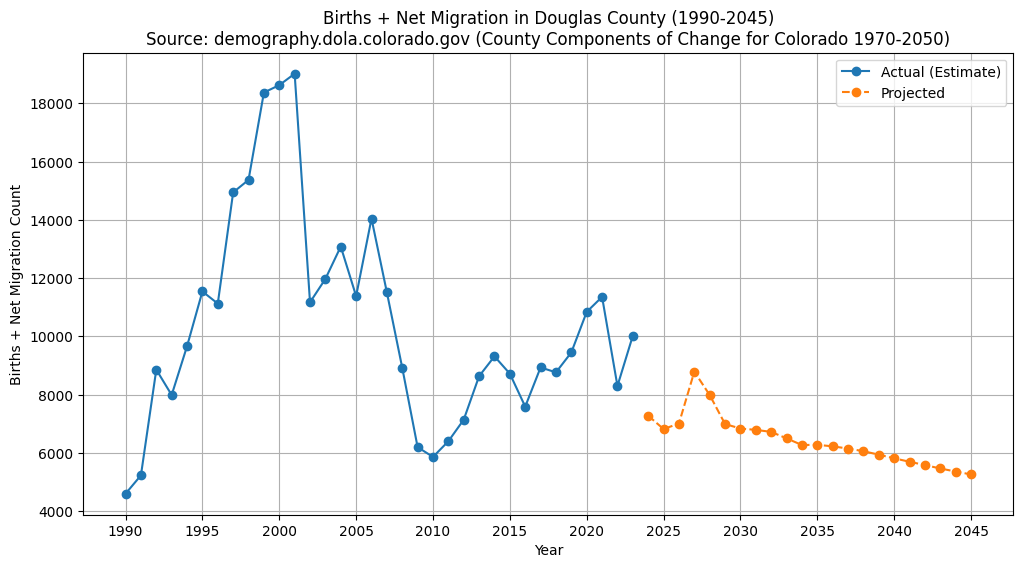

In [44]:
# Filter data from 1990 onwards
douglas_data_1990 = douglas_data_new[douglas_data_new['year'] >= 1990]

# Add births + netmig as a new column
douglas_data_1990['births_and_migration'] = douglas_data_1990['births'] + douglas_data_1990['netmig']

# Separate actual estimates and projections for post-1990 data
actual_data_1990 = douglas_data_1990[douglas_data_1990['datatype'] == 'Estimate']
projected_data_1990 = douglas_data_1990[douglas_data_1990['datatype'] == 'Projection']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(actual_data_1990['year'], actual_data_1990['births_and_migration'], marker='o', label='Actual (Estimate)')
plt.plot(projected_data_1990['year'], projected_data_1990['births_and_migration'], marker='o', label='Projected', linestyle='--')

# Customize the plot
plt.title('Births + Net Migration in Douglas County (1990-2045)\nSource: demography.dola.colorado.gov (County Components of Change for Colorado 1970-2050)')
plt.xlabel('Year')
plt.ylabel('Births + Net Migration Count')
plt.xticks(range(1990, 2046, 5))
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

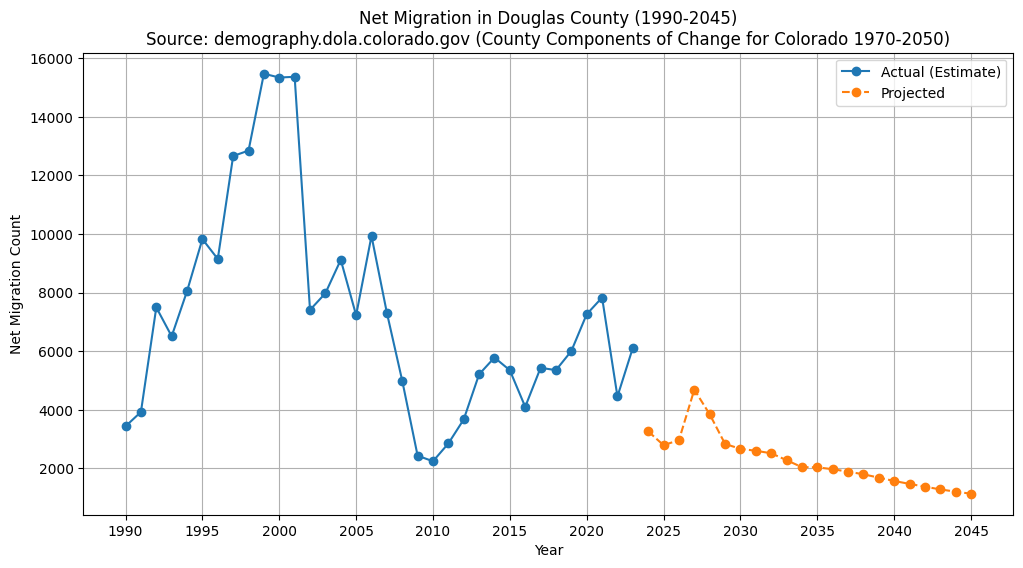

In [47]:
# Filter data from 1990 onwards
douglas_data_1990 = douglas_data_new[douglas_data_new['year'] >= 1990]

# Separate actual estimates and projections for post-1990 data
actual_data_1990 = douglas_data_1990[douglas_data_1990['datatype'] == 'Estimate']
projected_data_1990 = douglas_data_1990[douglas_data_1990['datatype'] == 'Projection']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(actual_data_1990['year'], actual_data_1990['netmig'], marker='o', label='Actual (Estimate)')
plt.plot(projected_data_1990['year'], projected_data_1990['netmig'], marker='o', label='Projected', linestyle='--')

# Customize the plot
plt.title('Net Migration in Douglas County (1990-2045)\nSource: demography.dola.colorado.gov (County Components of Change for Colorado 1970-2050)')
plt.xlabel('Year')
plt.ylabel('Net Migration Count')
plt.xticks(range(1990, 2046, 5))
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

/var/folders/gv/8y8kgtw10_37gt24l8br4nvc0000gn/T/ipykernel_74726/2108594196.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df_filtered['births_and_migration'] = county_df_filtered['births'] + county_df_filtered['netmig']
/var/folders/gv/8y8kgtw10_37gt24l8br4nvc0000gn/T/ipykernel_74726/2108594196.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df_filtered['births_and_migration'] = county_df_filtered['births'] + county_df_filtered['netmig']
/var/folders/gv/8y8kgtw10_37gt24l8br4nvc0000

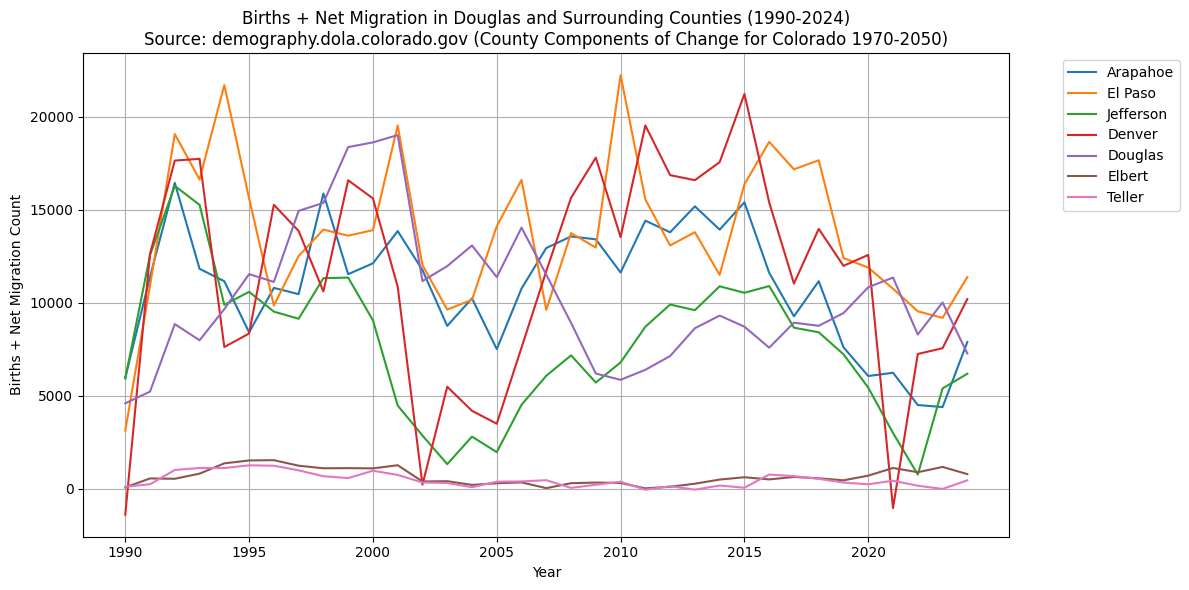

In [46]:
# Get data for specified counties
counties = ['Arapahoe', 'El Paso', 'Jefferson', 'Denver', 'Douglas', 'Elbert', 'Teller']
county_data = {}

df = pd.read_csv(new_file_path)

for county in counties:
    county_data[county] = df[df['countyname'] == county]

plt.figure(figsize=(12, 6))

# Plot data for each county
for county in counties:
    county_df = county_data[county]
    
    # Filter data from 1990 onwards and exclude projections
    county_df_filtered = county_df[(county_df['year'] >= 1990) & (county_df['year'] <= 2024)]
    
    # Plot data with solid line
    plt.plot(county_df_filtered['year'], county_df_filtered['netmig'], label=county)

# Customize the plot
plt.title('Net Migration in Douglas and Surrounding Counties (1990-2024)\nSource: demography.dola.colorado.gov (County Components of Change for Colorado 1970-2050)')
plt.xlabel('Year')
plt.ylabel('Net Migration Count')
plt.xticks(range(1990, 2024, 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

In [50]:
# Read the 2022-23 school membership data
school_df = pd.read_csv('2022-23_Membership_Grade_bySchool.csv')

# Filter for Douglas County schools and print their names
douglas_schools = school_df[school_df['County Name'] == 'DOUGLAS']
print("\nDouglas County Schools:")
print("----------------------")
for _, row in douglas_schools.iterrows():
    if pd.to_numeric(row['5th'], errors='coerce') > 0:
        print(row['School Name'])



Douglas County Schools:
----------------------
Academy Charter School
Acres Green Elementary School
Ben Franklin Academy
American Academy
Clear Sky Elementary
Gold Rush Elementary
Arrowwood Elementary School
Bear Canyon Elementary School
Buffalo Ridge Elementary School
Castle Rock Elementary School
Challenge to Excellence Charter School
Cloverleaf Home Education
Cherry Valley Elementary School
North Star Academy
Parker Core Knowledge Charter School
Copper Mesa Elementary School
Cougar Run Elementary School
Coyote Creek Elementary School
Rock Ridge Elementary School
Cherokee Trail Elementary School
Eagle Ridge Elementary School
Eldorado Elementary School
Mammoth Heights Elementary
Stone Mountain Elementary
Roxborough Intermediate
Flagstone Elementary School
Fox Creek Elementary School
Franktown Elementary School
Frontier Valley Elementary School
Global Village Academy - Douglas County
Heritage Elementary School
Iron Horse Elementary School
Larkspur Elementary School
Legacy Point Elemen

In [51]:
schools = [
    "Academy Charter School",
    "Acres Green Elementary School", 
    "Ben Franklin Academy",
    "American Academy",
    "Clear Sky Elementary",
    "Gold Rush Elementary",
    "Arrowwood Elementary School",
    "Bear Canyon Elementary School",
    "Buffalo Ridge Elementary School",
    "Castle Rock Elementary School",
    "Challenge to Excellence Charter School",
    "Cloverleaf Home Education",
    "Cherry Valley Elementary School",
    "North Star Academy",
    "Parker Core Knowledge Charter School",
    "Copper Mesa Elementary School",
    "Cougar Run Elementary School",
    "Coyote Creek Elementary School",
    "Rock Ridge Elementary School",
    "Cherokee Trail Elementary School",
    "Eagle Ridge Elementary School",
    "Eldorado Elementary School",
    "Mammoth Heights Elementary",
    "Stone Mountain Elementary",
    "Roxborough Intermediate",
    "Flagstone Elementary School",
    "Fox Creek Elementary School",
    "Franktown Elementary School",
    "Frontier Valley Elementary School",
    "Global Village Academy - Douglas County",
    "Heritage Elementary School",
    "Iron Horse Elementary School",
    "Larkspur Elementary School",
    "Legacy Point Elementary School",
    "Leman Classical Academy",
    "STEM School Highlands Ranch",
    "Sage Canyon Elementary",
    "Meadow View Elementary School",
    "Lone Tree Elementary",
    "DC Montessori Charter School",
    "Aspen View Academy",
    "Skyview Academy",
    "Northeast Elementary School",
    "Northridge Elementary School",
    "Parker Performing Arts",
    "Pine Grove Elementary School",
    "Pine Lane Elementary",
    "Pioneer Elementary School",
    "Platte River Charter Academy",
    "Prairie Crossing Elementary School",
    "Redstone Elementary School",
    "Renaissance Expedition Learn Outward Bound School",
    "Saddle Ranch Elementary School",
    "Sand Creek Elementary School",
    "Sedalia Elementary School",
    "Soaring Hawk Elementary School",
    "South Ridge Elementary An IB World School",
    "Summit View Elementary School",
    "Timber Trail Elementary School",
    "Trailblazer Elementary School",
    "World Compass Academy",
    "Wildcat Mountain Elementary School"
]
print(len(schools))

62


In [52]:
import pandas as pd

# Addresses gathered via Perplexity
data = {
    'school': [
        'Arrowwood Elementary School', 'Flagstone Elementary School', 'Pine Grove Elementary School',
        'Stone Mountain Elementary', 'Pioneer Elementary School', 'Castle Rock Elementary School',
        'Larkspur Elementary School', 'Prairie Crossing Elementary School', 'Parker Core Knowledge Charter School',
        'Gold Rush Elementary', 'Legacy Point Elementary School', 'Eldorado Elementary School',
        'Acres Green Elementary School', 'Franktown Elementary School', 'Clear Sky Elementary',
        'Parker Performing Arts', 'Academy Charter School', 'North Star Academy',
        'Challenge to Excellence Charter School', 'Cherokee Trail Elementary School',
        'Global Village Academy - Douglas County', 'Leman Classical Academy', 'Iron Horse Elementary School',
        'Aspen View Academy', 'Ben Franklin Academy', 'Frontier Valley Elementary School',
        'Sage Canyon Elementary', 'Coyote Creek Elementary School', 'DC Montessori Charter School',
        'Cloverleaf Home Education', 'Heritage Elementary School', 'Copper Mesa Elementary School',
        'Meadow View Elementary School', 'Rock Ridge Elementary School', 'Platte River Charter Academy',
        'Northridge Elementary School', 'Skyview Academy', 'Pine Lane Elementary',
        'Fox Creek Elementary School', 'Northeast Elementary School', 'American Academy',
        'Buffalo Ridge Elementary School', 'Roxborough Intermediate', 'Eagle Ridge Elementary School',
        'STEM School Highlands Ranch', 'Cougar Run Elementary School', 'Cherry Valley Elementary School',
        'Lone Tree Elementary', 'Mammoth Heights Elementary', 'Bear Canyon Elementary School'
    ],
    'city': [
        'Highlands Ranch', 'Castle Rock', 'Parker', 'Highlands Ranch', 'Parker', 'Castle Rock',
        'Larkspur', 'Parker', 'Parker', 'Parker', 'Parker', 'Highlands Ranch', 'Littleton',
        'Franktown', 'Castle Rock', 'Parker', 'Castle Rock', 'Parker', 'Parker', 'Parker',
        'Parker', 'Parker', 'Parker', 'Castle Rock', 'Highlands Ranch', 'Parker',
        'Castle Rock', 'Highlands Ranch', 'Castle Rock', 'Castle Rock', 'Highlands Ranch',
        'Highlands Ranch', 'Castle Rock', 'Castle Rock', 'Highlands Ranch', 'Highlands Ranch',
        'Highlands Ranch', 'Parker', 'Highlands Ranch', 'Parker', 'Castle Pines',
        'Castle Pines', 'Littleton', 'Lone Tree', 'Highlands Ranch', 'Highlands Ranch',
        'Franktown', 'Lone Tree', 'Parker', 'Highlands Ranch'
    ]
}

addresses = pd.DataFrame(data)
addresses.head()

,school,city
0,Arrowwood Elementary School,Highlands Ranch
1,Flagstone Elementary School,Castle Rock
2,Pine Grove Elementary School,Parker
3,Stone Mountain Elementary,Highlands Ranch
4,Pioneer Elementary School,Parker
